In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.ensemble as ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from lib_fun import *
from skimage.feature import hog
from skimage import feature
from skimage import measure

X shape: (4559, 20, 20, 3), Y shape: (4559,)
X shape: (4559, 50, 50, 3), Y shape: (4559,)
X shape: (4559, 100, 100, 3), Y shape: (4559,)


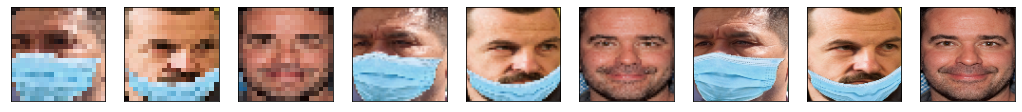

In [2]:
# Load the original face mask data with pixel of 20*20, 50*50 and 100*100
# We visulaize these image of Correct, Incorrect and No mask with each resolution.
data20, labels20 = load('../Data/Pixel20/')
data50, labels50 = load('../Data/Pixel50/')
data100, labels100 = load('../Data/Pixel100/')
VisualizeRGB(data20, data50, data100)

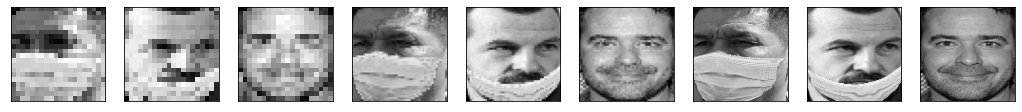

In [3]:
# In order to reduce the input dimension and keep critical information, we transfer the RGB image to gray image
data20_gray = RGBtoGray(data20)
data50_gray = RGBtoGray(data50)
data100_gray = RGBtoGray(data100)
VisualizeGray(data20_gray, data50_gray, data100_gray)

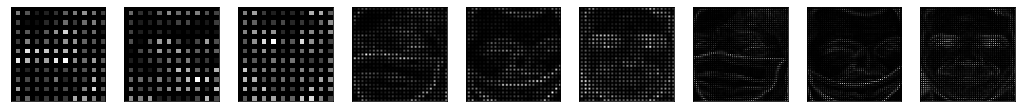

In [4]:
# Using Histogram of Oriented Gradients to extract features from RGB image
# Compute 8 direction in each 2*2 pixel
data20_hog = RGBtoHOG(data20)
data50_hog = RGBtoHOG(data50)
data100_hog = RGBtoHOG(data100)
VisualizeGray(data20_hog, data50_hog, data100_hog)

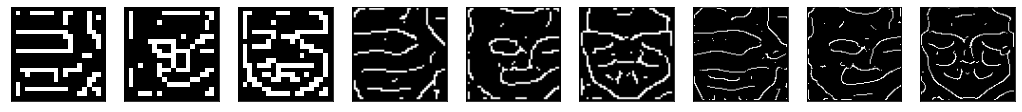

In [7]:
# Using Canny edge detector to extract features from gray image
data20_edge = GRAYtoEDGE(data20_gray, sigma=1)
data50_edge = GRAYtoEDGE(data50_gray, sigma=3)
data100_edge = GRAYtoEDGE(data100_gray, sigma=5)
VisualizeGray(data20_edge, data50_edge, data100_edge)

In [10]:
# Training process using different model.
# Flatten the image as the input data of model
def train_model(model, data, labels):
    x = Flatten(data) 
    x_train, x_test , y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=1)
    clf = make_pipeline( StandardScaler(), model)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print('accuracy: ', metrics.accuracy_score(y_test, pred)) 
    confusion = metrics.confusion_matrix(y_test, pred)
    # print('confusion matrix:')
    # print(confusion)
    # plot_confusion(confusion)
    return confusion

Firstly We implement one vs rest SVM model. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.
As we are using a soft margin SVM, we set the penalty term C as 1. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. And we are using a kernel function to map the input features to a higher dimension space. In this experiment, we compare the linear, polynomial and rbf kernel. 
We choose gray and hog data as out training data in this experiment.


accuracy:  0.7905701754385965
accuracy:  0.7324561403508771
accuracy:  0.7214912280701754


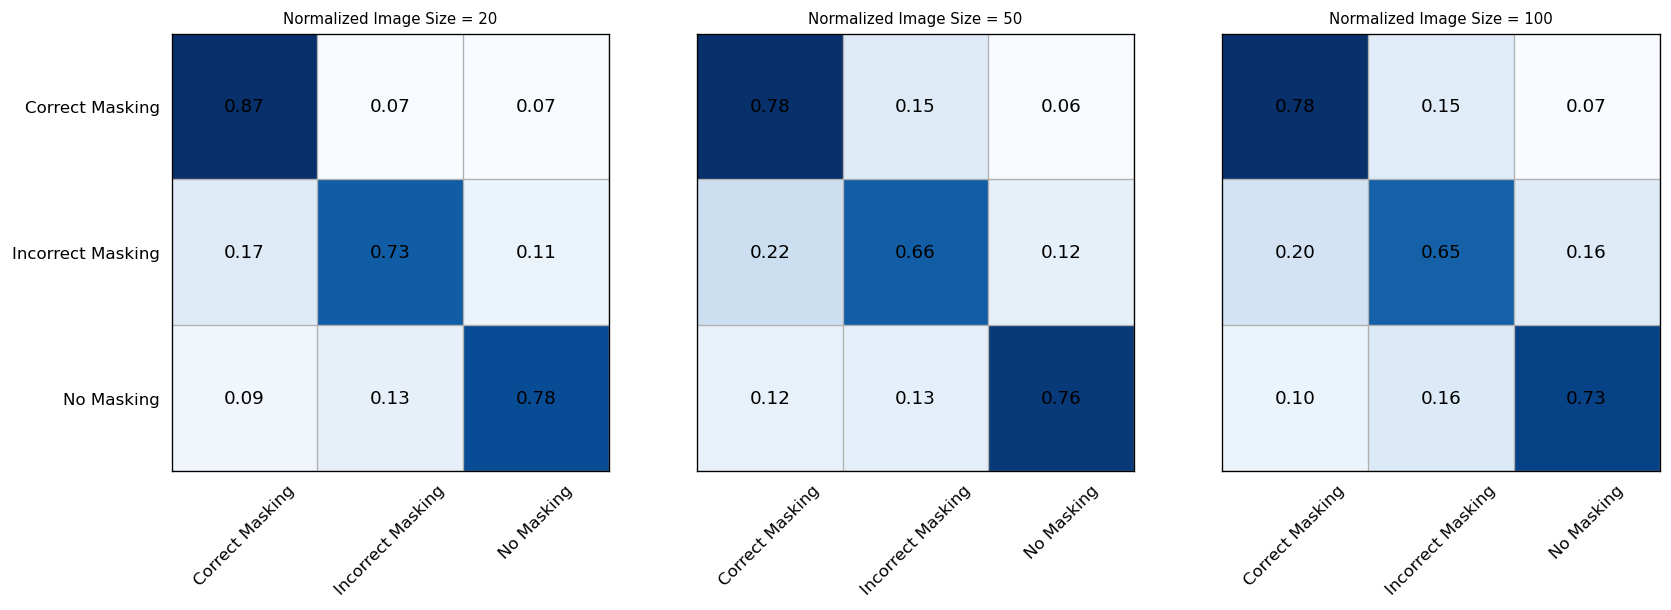

In [26]:
# SVM with linear kernel, using gray images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data20_gray, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data50_gray, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.8125
accuracy:  0.7521929824561403
accuracy:  0.8004385964912281


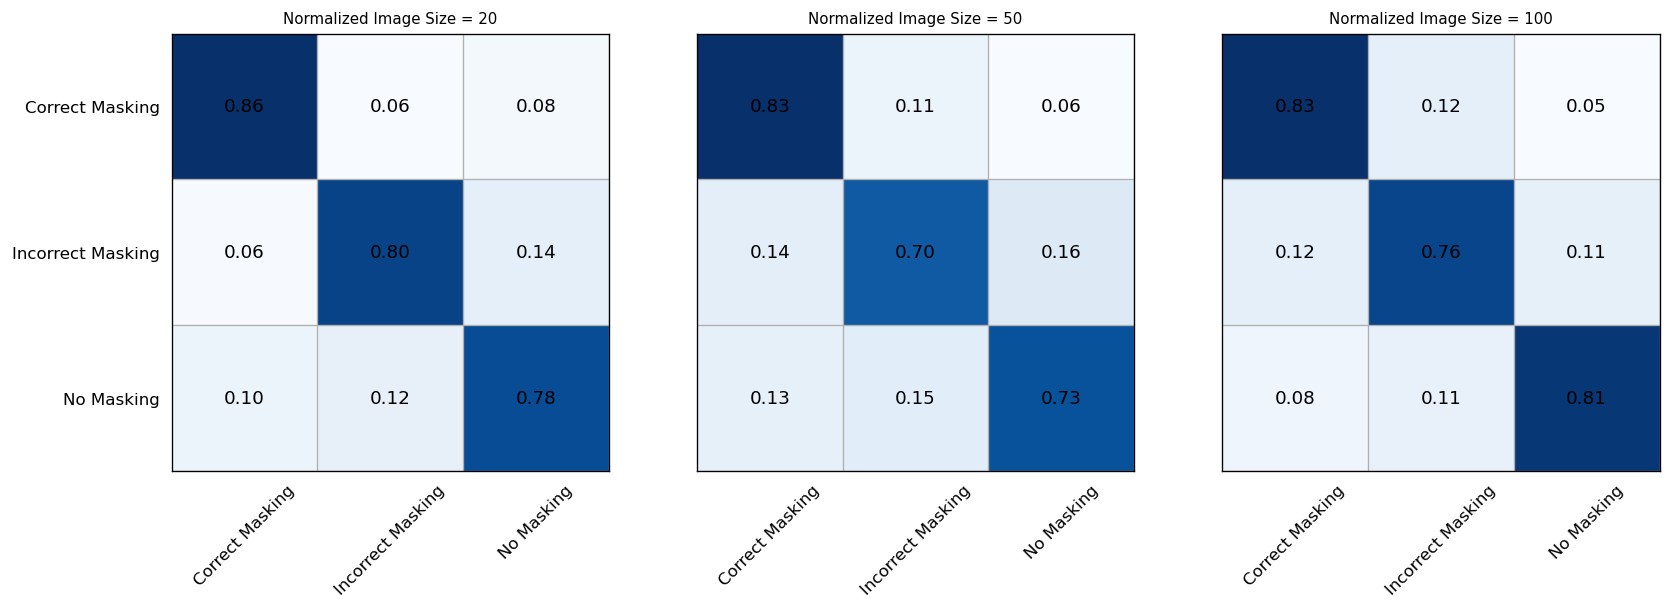

In [27]:
# SVM with linear kernel, using hog images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data20_hog, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data50_hog, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='linear', cache_size=4000), data100_hog, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.8859649122807017
accuracy:  0.8914473684210527
accuracy:  0.8903508771929824


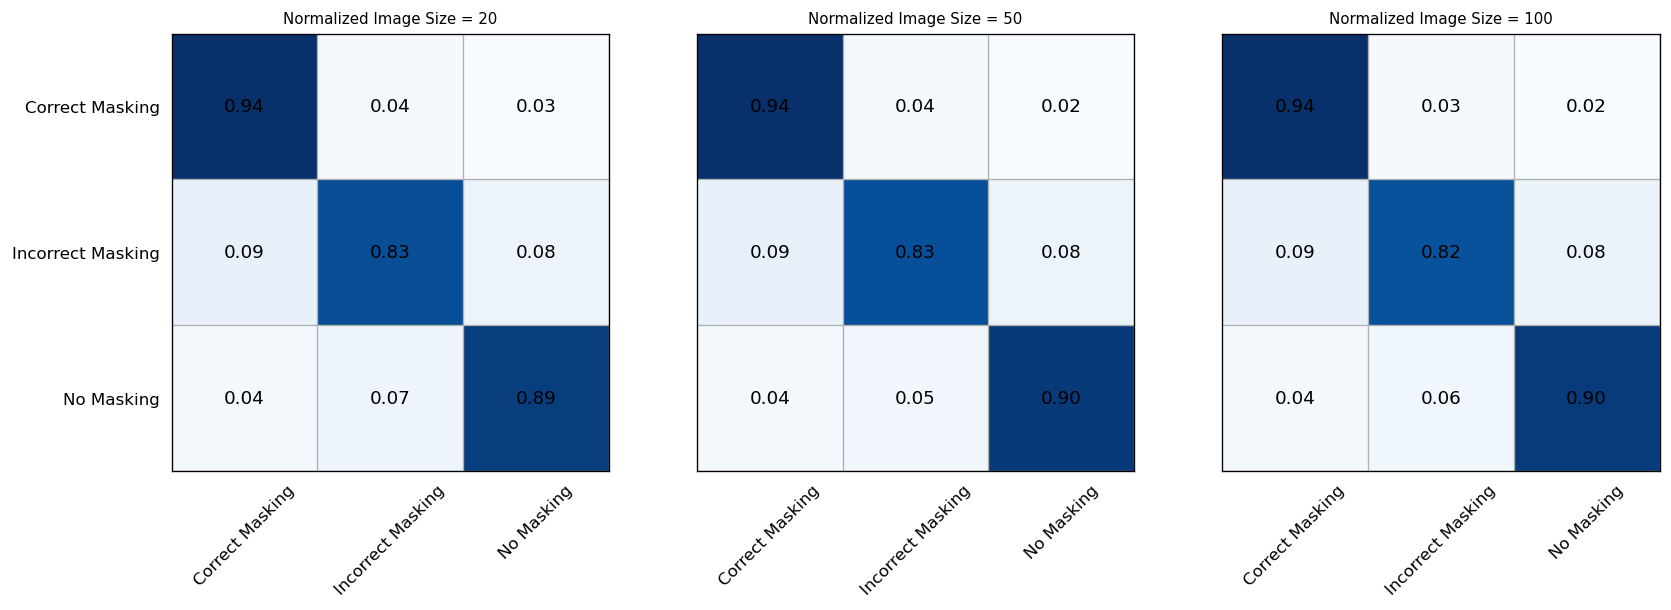

In [28]:
# SVM with rbf kernel, using gray images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='rbf', cache_size=4000), data20_gray, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='rbf', cache_size=4000), data50_gray, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='rbf', cache_size=4000), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.8881578947368421
accuracy:  0.8980263157894737
accuracy:  0.881578947368421


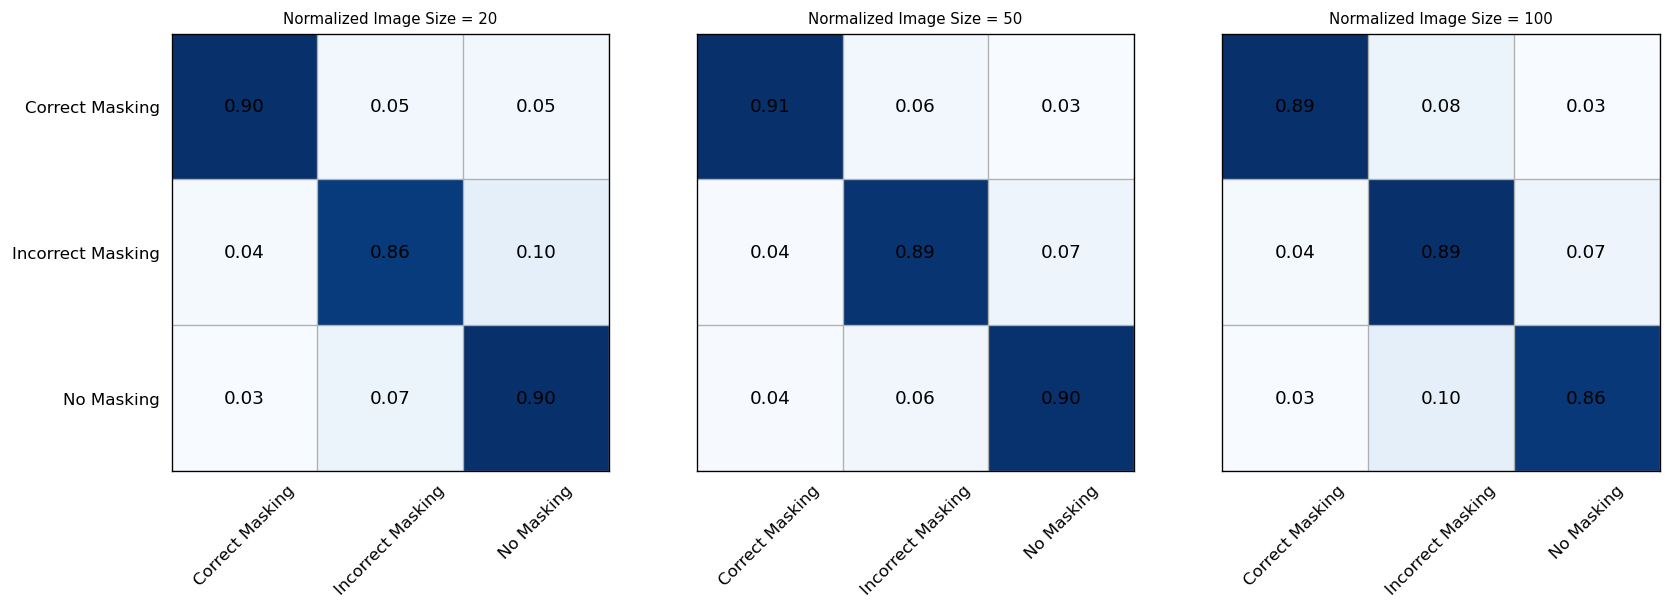

In [29]:
# SVM with rbf kernel, using hog images as data.
confusion20 = train_model(svm.SVC(C=1, kernel='rbf', cache_size=4000), data20_hog, labels20)
confusion50 = train_model(svm.SVC(C=1, kernel='rbf', cache_size=4000), data50_hog, labels50)
confusion100 = train_model(svm.SVC(C=1, kernel='rbf', cache_size=4000), data100_hog, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

We can see that the using the rbf kernel instead of linear kernel in SVM can improve nearly 10% accuracy. The resolution and features extracotr methods will affect the accuracy with linear kernel and have little influence with rbf kernel.

The next model we choose is decision tree. Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
In our setting, the maximum depth of the tree is nor specified, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
And we compare the results of using gray, hog and canny dataset. 

accuracy:  0.8070175438596491
accuracy:  0.8015350877192983
accuracy:  0.7916666666666666


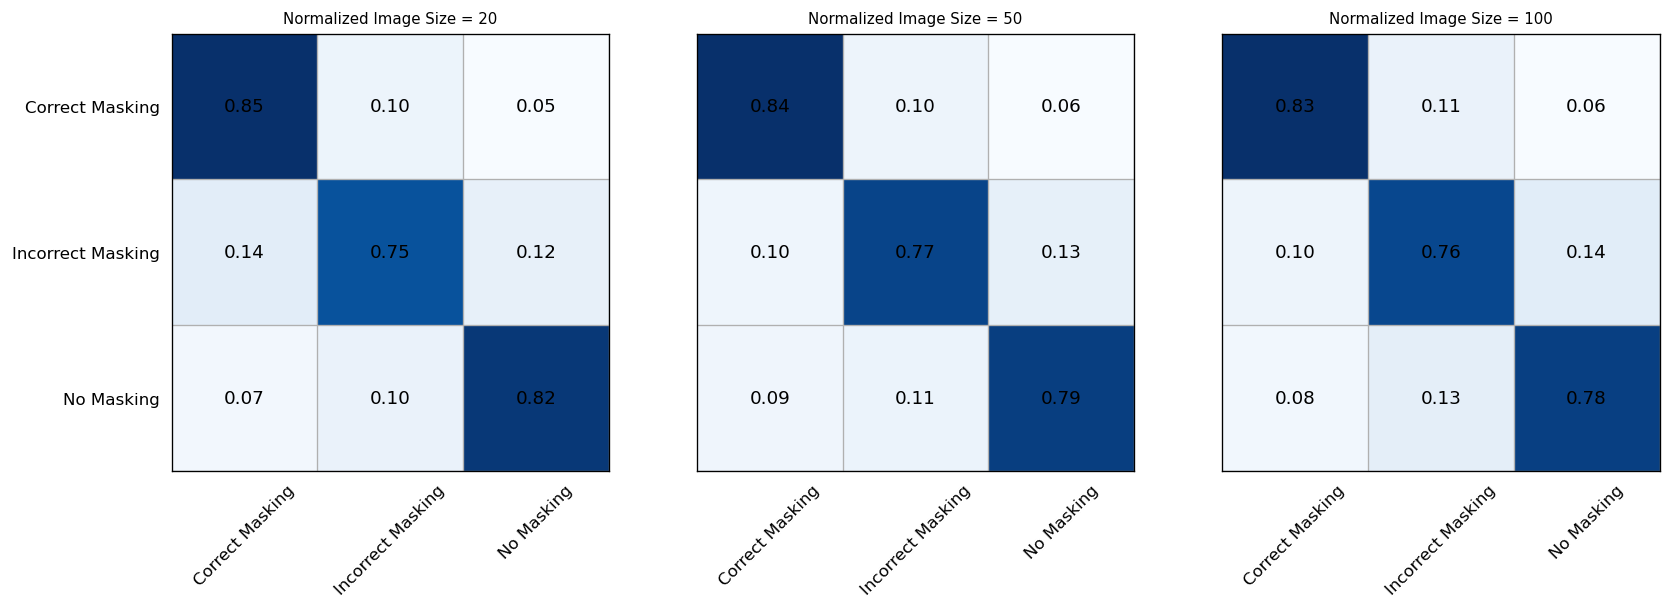

In [41]:
# Decision Tree on gray image.
confusion20 = train_model(tree.DecisionTreeClassifier(), data20_gray, labels20)
confusion50 = train_model(tree.DecisionTreeClassifier(), data50_gray, labels50)
confusion100 = train_model(tree.DecisionTreeClassifier(), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.7631578947368421
accuracy:  0.7642543859649122
accuracy:  0.7335526315789473


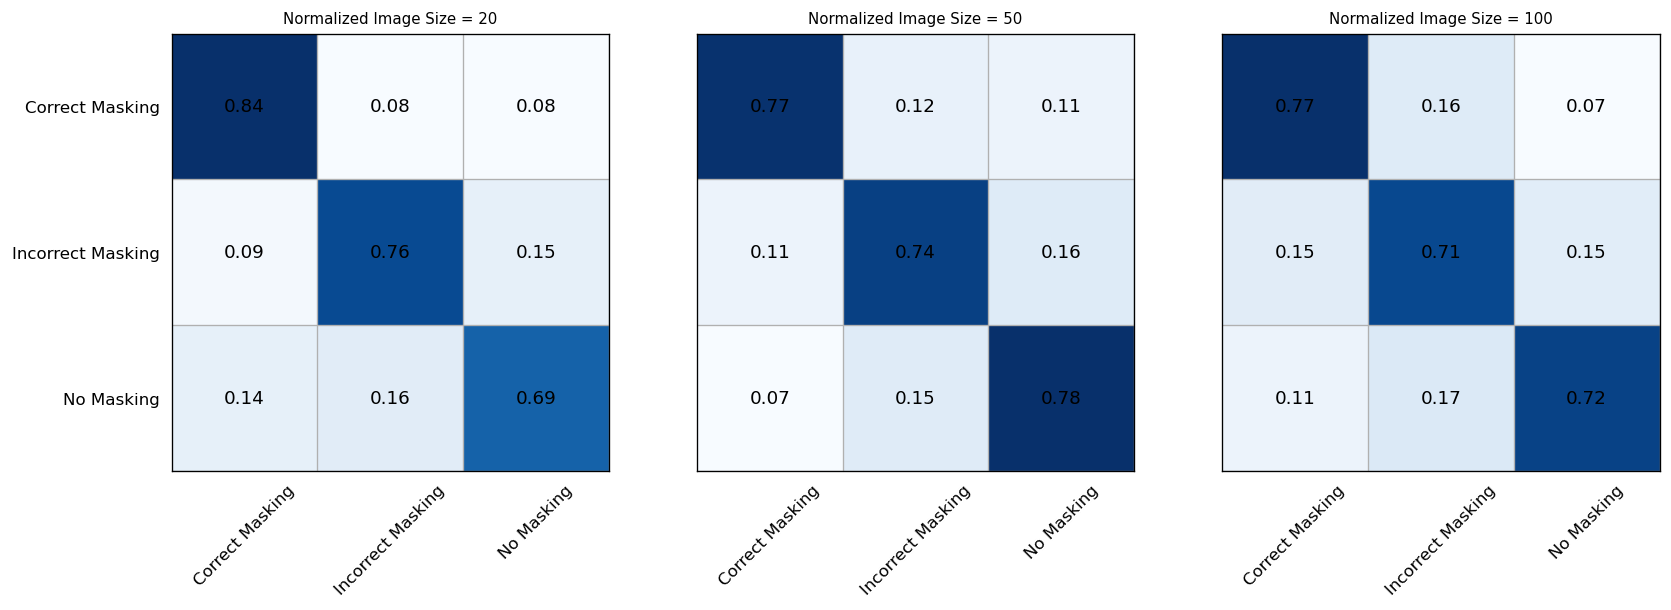

In [42]:
# Decision Tree on hog image.
confusion20 = train_model(tree.DecisionTreeClassifier(), data20_hog, labels20)
confusion50 = train_model(tree.DecisionTreeClassifier(), data50_hog, labels50)
confusion100 = train_model(tree.DecisionTreeClassifier(), data100_hog, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.5175438596491229
accuracy:  0.5493421052631579
accuracy:  0.47149122807017546


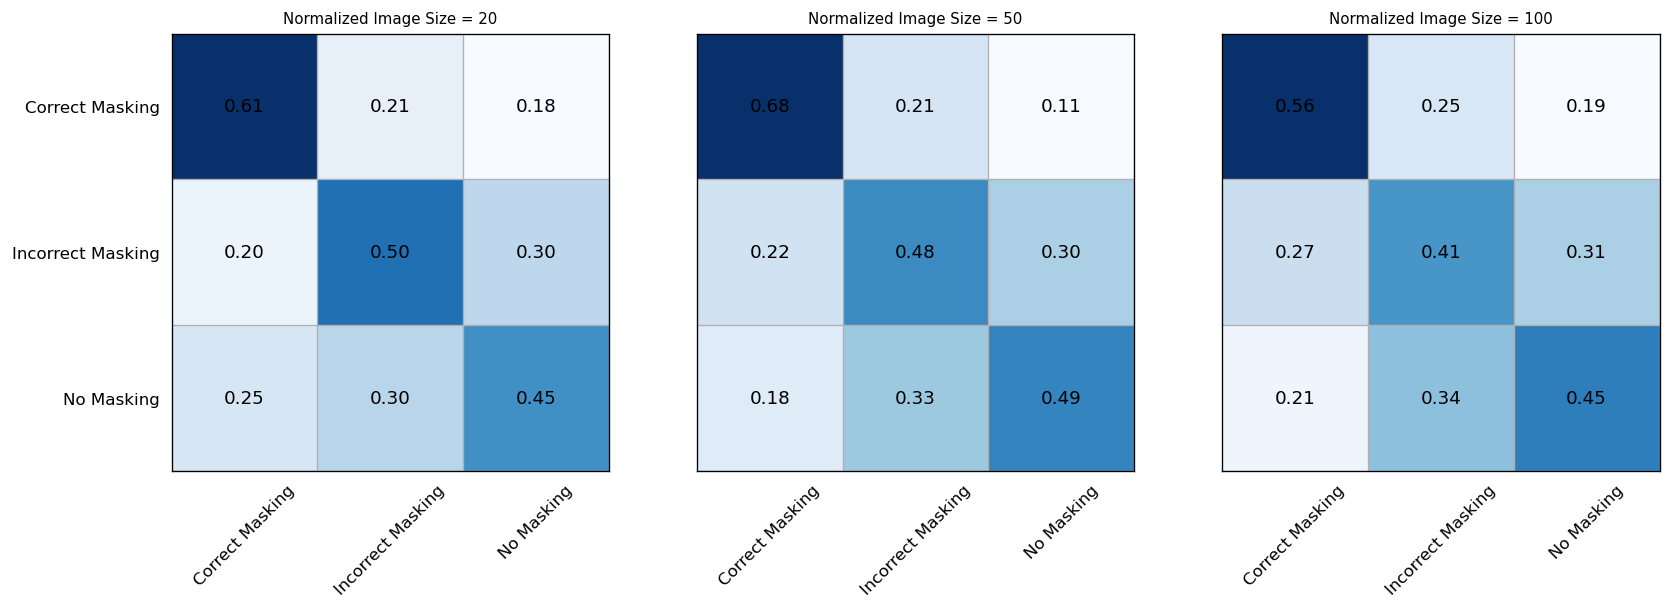

In [43]:
# Decision Tree on hog image.
confusion20 = train_model(tree.DecisionTreeClassifier(), data20_edge, labels20)
confusion50 = train_model(tree.DecisionTreeClassifier(), data50_edge, labels50)
confusion100 = train_model(tree.DecisionTreeClassifier(), data100_edge, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

We can see that hog extractor has bad influence on the results, while canny extractor has very bad influence on the results. And the accuarcy of a single tree is worse than SVM with rbf kernel.

Then, we try the random forest algorithm. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. In our setting, The maximum depth of the tree is nor specified, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. And we compare the results of 5, 10 and 50 subtrees on only gray dataset.         

accuracy:  0.8453947368421053
accuracy:  0.8442982456140351
accuracy:  0.8585526315789473


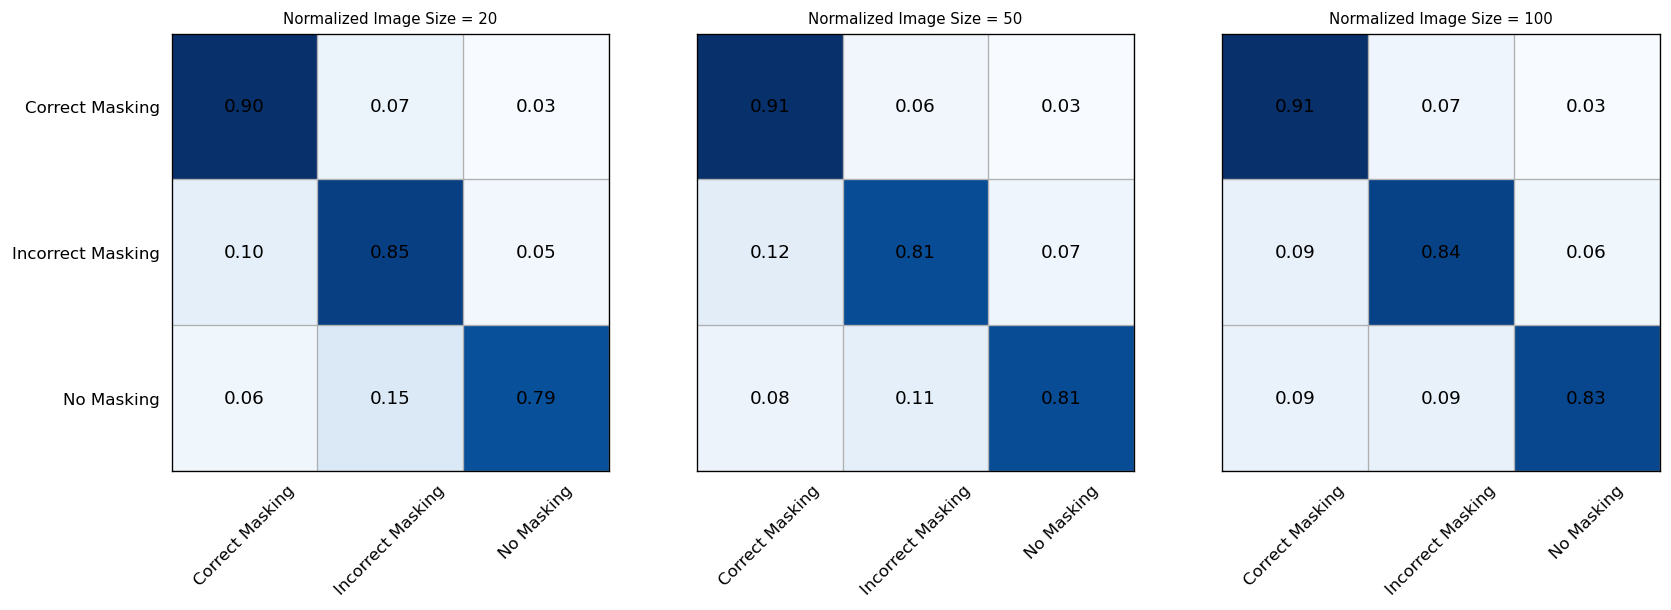

In [44]:
# Random Forest using 5 subtrees on gray image.
confusion20 = train_model(ensemble.RandomForestClassifier(n_estimators= 5), data20_gray, labels20)
confusion50 = train_model(ensemble.RandomForestClassifier(n_estimators= 5), data50_gray, labels50)
confusion100 = train_model(ensemble.RandomForestClassifier(n_estimators= 5), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.8640350877192983
accuracy:  0.868421052631579
accuracy:  0.8804824561403509


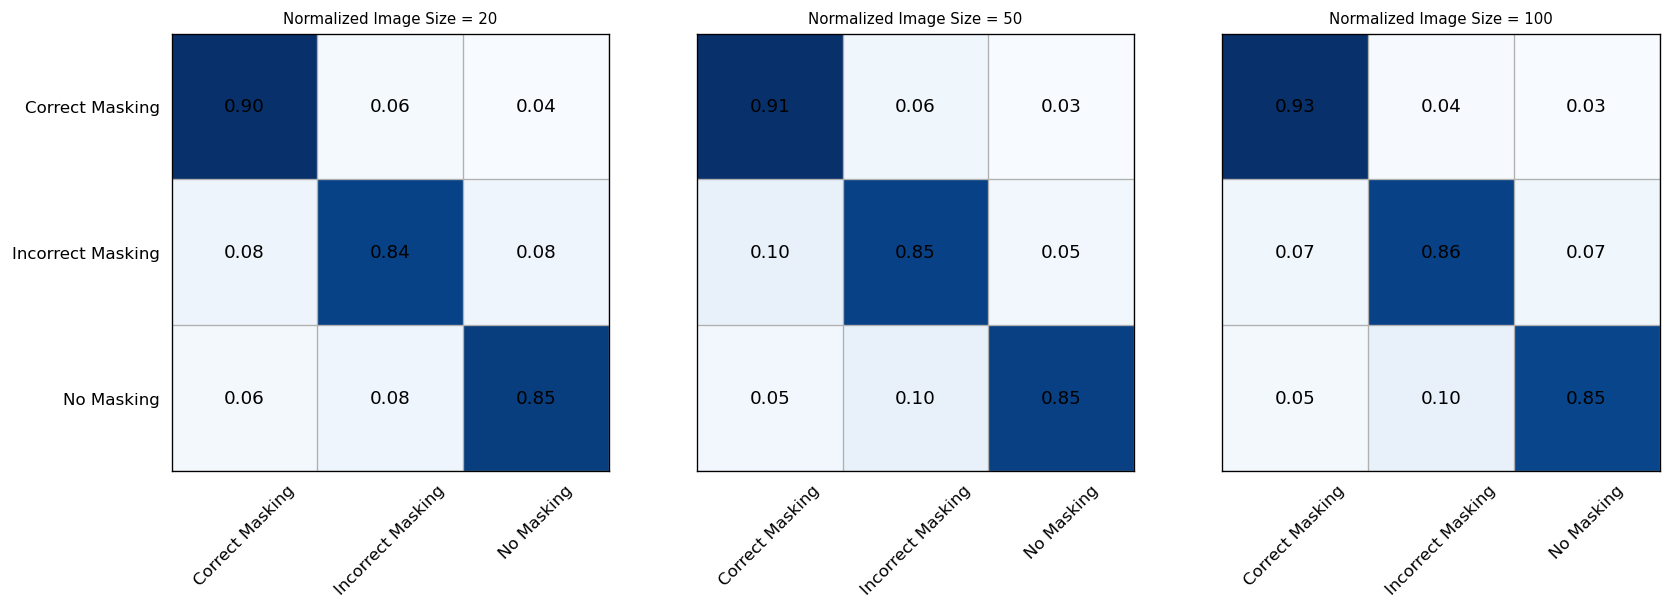

In [30]:
# Random Forest using 10 subtrees on gray image.
confusion20 = train_model(ensemble.RandomForestClassifier(n_estimators= 10), data20_gray, labels20)
confusion50 = train_model(ensemble.RandomForestClassifier(n_estimators= 10), data50_gray, labels50)
confusion100 = train_model(ensemble.RandomForestClassifier(n_estimators= 10), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.9024122807017544
accuracy:  0.8925438596491229
accuracy:  0.8991228070175439


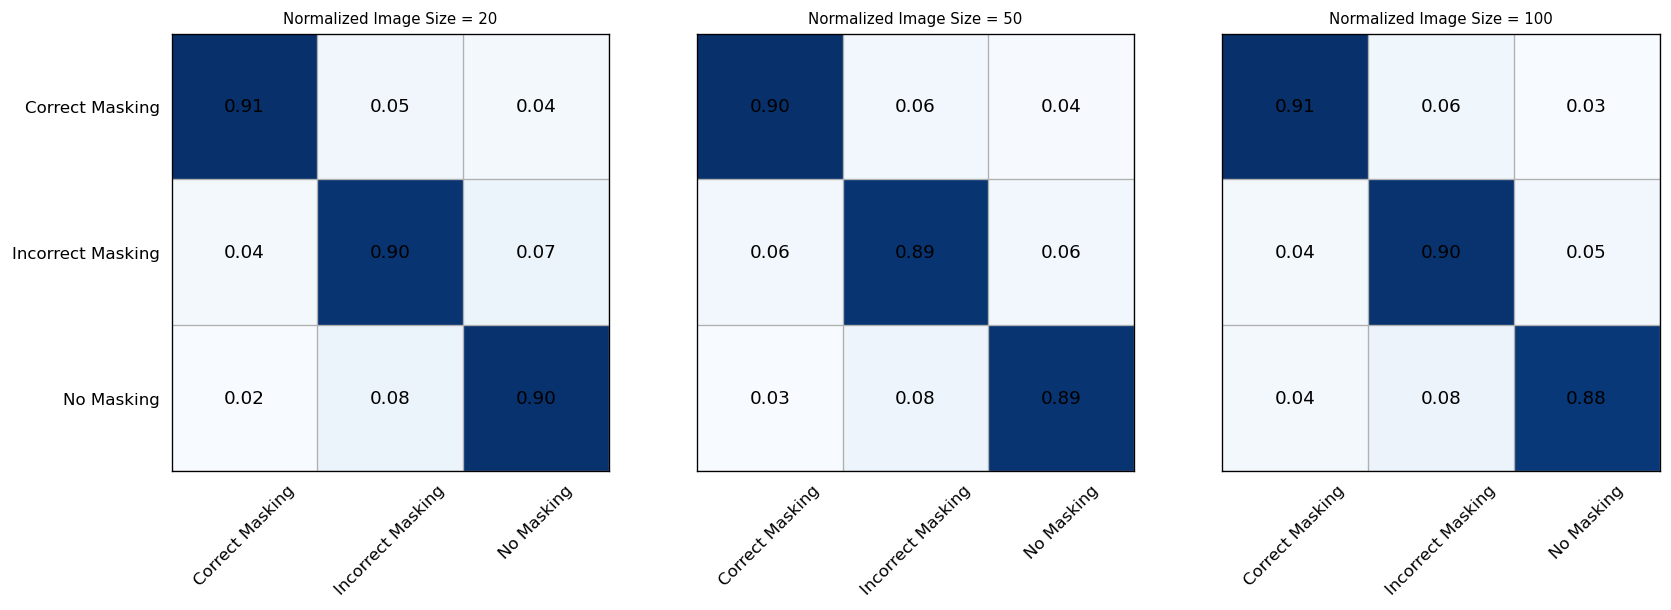

In [45]:
# Random Forest using 100 subtrees on gray image.
confusion20 = train_model(ensemble.RandomForestClassifier(n_estimators= 50), data20_gray, labels20)
confusion50 = train_model(ensemble.RandomForestClassifier(n_estimators= 50), data50_gray, labels50)
confusion100 = train_model(ensemble.RandomForestClassifier(n_estimators= 50), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

We can see that random forest has higher accuarcy than a single tree, and the more subtress we use, the higher accuarcy we can gain.

Finally, instead of using scikit learn package, we implement a linear model from scratch.

In [46]:
import sys
from lib.math_optimization_library import static_plotter
import autograd.numpy as np
from autograd.misc.flatten import flatten_func
from autograd import grad as gradient
from lib import edge_extract
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from Conventional_Ml_Method import *

sys.path.append('..')

plotter = static_plotter.Visualizer()

data_name = ['Correct.npy', 'Incorrect.npy', 'NoMask.npy', ]
mnist = MNIST_Classification(data_name, img_size=[100, 100])
N = mnist.x_rand.shape[0]
C = len(np.unique(mnist.y_rand))
w = 0.1 * np.random.randn(N + 1, C)
weight_his, cost_his = mnist.gradient_descent(mnist.cost_function, w, mnist.x_rand, mnist.y_rand, alpha=0.02,
                                                max_its=100, batch_size=300)
N = mnist.x_edge.shape[0]
w = 0.1 * np.random.randn(N + 1, C)
weight_edge_his, cost_edge_his = mnist.gradient_descent(mnist.cost_function, w, mnist.x_edge, mnist.y_rand,
                                                        alpha=0.02,
                                                        max_its=100, batch_size=300)
mis1 = mnist.misclass_counting(mnist.x_rand, mnist.y_rand, weight_his)
mnist.confusion_matrix(mis1, mnist.x_rand, mnist.y_rand, weight_his,
                        labels=["Correct Masking", "Incorrect Masking", "No Masking"],
                        normalize=True,
                        title="Confusion matrix: Raw Dataset")

mis2 = mnist.misclass_counting(mnist.x_edge, mnist.y_rand, weight_edge_his)
mnist.confusion_matrix(mis2, mnist.x_edge, mnist.y_rand, weight_edge_his,
                        labels=["Correct Masking", "Incorrect Masking", "No Masking"],
                        normalize=True,
                        title="Confusion matrix: HoG Dataset")

plotter.plot_mismatching_histories(histories=[mis1, mis2], start=1,
                                    labels=['Raw', 'Hog'],
                                    title="Training Mis-classification History")
plotter.plot_cost_histories(histories=[cost_his, cost_edge_his], start=0,
                            labels=['Raw', 'Hog'],
                            title="Training Cost History")